In [12]:
# Laden wir zuerst den Datensatz von sklearn.
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


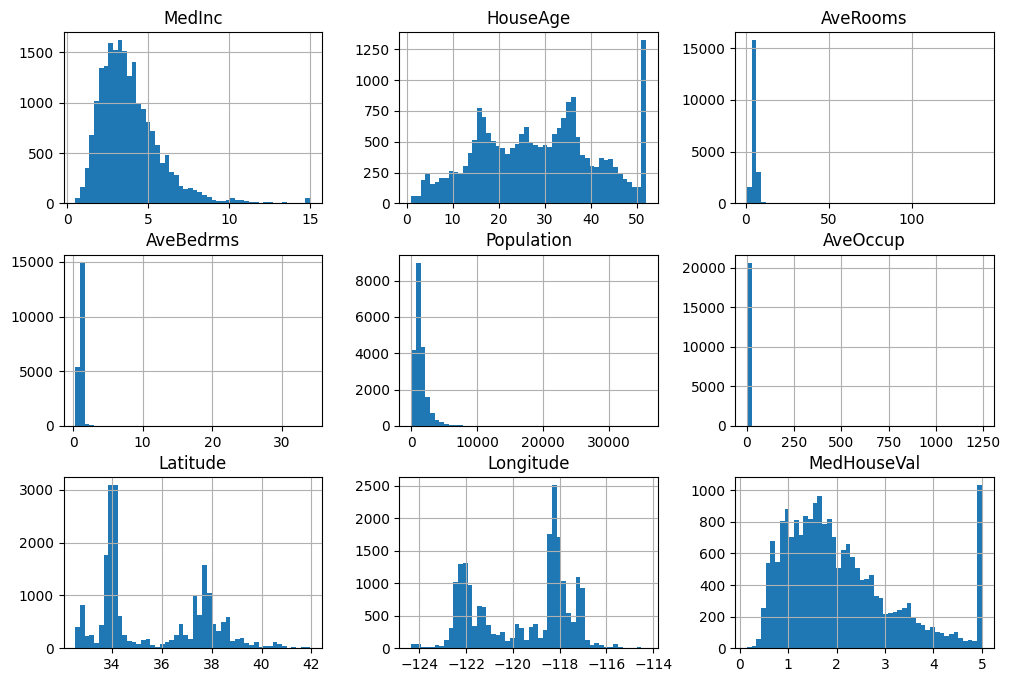

In [13]:
# Jetzt können wir uns die Daten in Histogrammen ausgeben lassen.
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,8))
plt.show()

In [14]:
# Interessant ist, wie viel Einfluss einzelne Parameter haben.
corr = housing.corr()
corr['MedHouseVal'].sort_values(ascending=True)

,MedHouseVal
Latitude,-0.144160
AveBedrms,-0.046701
Longitude,-0.045967
Population,-0.024650
AveOccup,-0.023737
HouseAge,0.105623
AveRooms,0.151948
MedInc,0.688075
MedHouseVal,1.000000


In [15]:
# Wir laden den Datensatz nochmals von Tensorflow, da das Format der Daten
# bereits richtig vorliegt.
import tensorflow as tf

ds_train, ds_test = tf.keras.datasets.california_housing.load_data(
    version='large',
    path='california_housing.npz',
    test_split=0.2,
    seed=113
)

In [16]:
x_train, y_train = ds_train
x_train.shape, y_train.shape

((16512, 8), (16512,))

In [17]:
x_test, y_test = ds_test
x_test.shape, y_test.shape

((4128, 8), (4128,))

In [18]:
# Jetzt können wir das Modell laden.
model = tf.keras.models.load_model("california_housing.keras")
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ DenseLayer1 (Dense)             │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ReLu1 (Activation)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer2 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ReLu2 (Activation)              │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer3 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LeakyReLu (Activation)          │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer4 (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [19]:
# Und das Modell anhand der Testdaten evaluieren.
model.evaluate(x=x_test, y=y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4985924608.0000 - mean_absolute_error: 50554.6680


[4753190912.0, 49540.55078125]

In [21]:
# Nun können wir auch unser eigenes Haus evaluieren lassen.
input_tensor = tf.constant([-118.36,34.08,45,2195,483,1265,455,3.3864], dtype=tf.float32)

input_tensor = tf.expand_dims(input_tensor, axis=0)

model.predict(input_tensor)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([186273.44], dtype=float32)